In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Dataset
temperatures = np.array([60, 70, 72, 68, 78, 75, 82, 65])
comfort_labels = np.array([0, 1, 1, 1, 0, 1, 0, 0])  # 0=Uncomfortable, 1=Comfortable

print("Training Dataset:")
for temp, comfort in zip(temperatures, comfort_labels):
    status = "Comfortable" if comfort == 1 else "Uncomfortable"
    print(f"  {temp}°F → {status}")

# Simple threshold-based approach
def find_optimal_threshold(temps, labels):
    best_threshold = None
    best_accuracy = 0

    for threshold_low in range(65, 75):
        for threshold_high in range(75, 80):
            # Define comfort zone
            predictions = ((temps >= threshold_low) & (temps <= threshold_high)).astype(int)
            accuracy = accuracy_score(labels, predictions)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_threshold = (threshold_low, threshold_high)

    return best_threshold, best_accuracy

optimal_range, accuracy = find_optimal_threshold(temperatures, comfort_labels)
print(f"\nOptimal comfort range: {optimal_range[0]}°F - {optimal_range[1]}°F")
print(f"Training accuracy: {accuracy:.2%}")

# Apply the rule
predictions = ((temperatures >= optimal_range[0]) &
               (temperatures <= optimal_range[1])).astype(int)

# Test on new data
new_temperatures = np.array([66, 73, 79, 85])
new_predictions = ((new_temperatures >= optimal_range[0]) &
                   (new_temperatures <= optimal_range[1])).astype(int)

print("\nPredictions for new temperatures:")
for temp, pred in zip(new_temperatures, new_predictions):
    status = "Comfortable" if pred == 1 else "Uncomfortable"
    print(f"  {temp}°F → {status}")

Training Dataset:
  60°F → Uncomfortable
  70°F → Comfortable
  72°F → Comfortable
  68°F → Comfortable
  78°F → Uncomfortable
  75°F → Comfortable
  82°F → Uncomfortable
  65°F → Uncomfortable

Optimal comfort range: 66°F - 75°F
Training accuracy: 100.00%

Predictions for new temperatures:
  66°F → Comfortable
  73°F → Comfortable
  79°F → Uncomfortable
  85°F → Uncomfortable


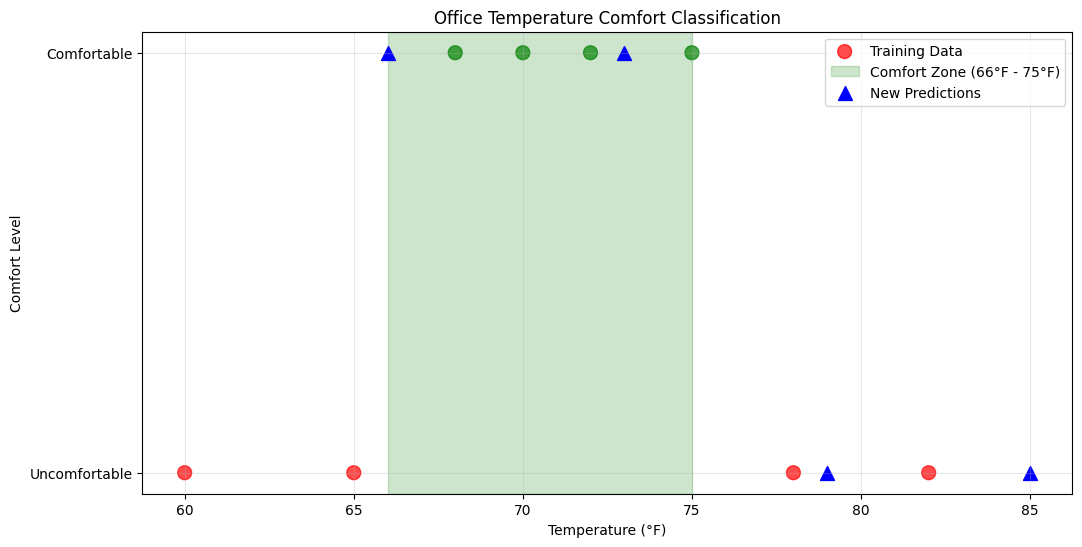

In [2]:
plt.figure(figsize=(12, 6))

# Plot training data
colors = ['red' if comfort == 0 else 'green' for comfort in comfort_labels]
plt.scatter(temperatures, comfort_labels, c=colors, s=100, alpha=0.7, label='Training Data')

# Add comfort zone
plt.axvspan(optimal_range[0], optimal_range[1], alpha=0.2, color='green',
           label=f'Comfort Zone ({optimal_range[0]}°F - {optimal_range[1]}°F)')

# Plot new predictions
plt.scatter(new_temperatures, new_predictions, c='blue', s=100,
           marker='^', label='New Predictions')

plt.xlabel('Temperature (°F)')
plt.ylabel('Comfort Level')
plt.title('Office Temperature Comfort Classification')
plt.yticks([0, 1], ['Uncomfortable', 'Comfortable'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()